## Global settings

Install, if it is required, the corresponding packages.
Different choices (hope some of them works)

In [94]:
#rootDir <- "./" # directory containing Rcode/ and data/ directories
# install.packages("tidyr") 
# conda install r-tidyr
# install.packages("tidyr", repos='http://cran.us.r-project.org')
# conda install r-gridExtra
# install.packages("gridExtra", '/Users/meme/anaconda3/lib/R/library')
# install.packages("LearnBayes", '/Users/meme/anaconda3/lib/R/library')


Warning message in install.packages("gtools", "/Users/meme/anaconda3/lib/R/library"):
“installation of package ‘gtools’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Required packages

In [59]:
library(ggplot2)
library(tidyr)  
library(gridExtra)

[1] 0.01530612

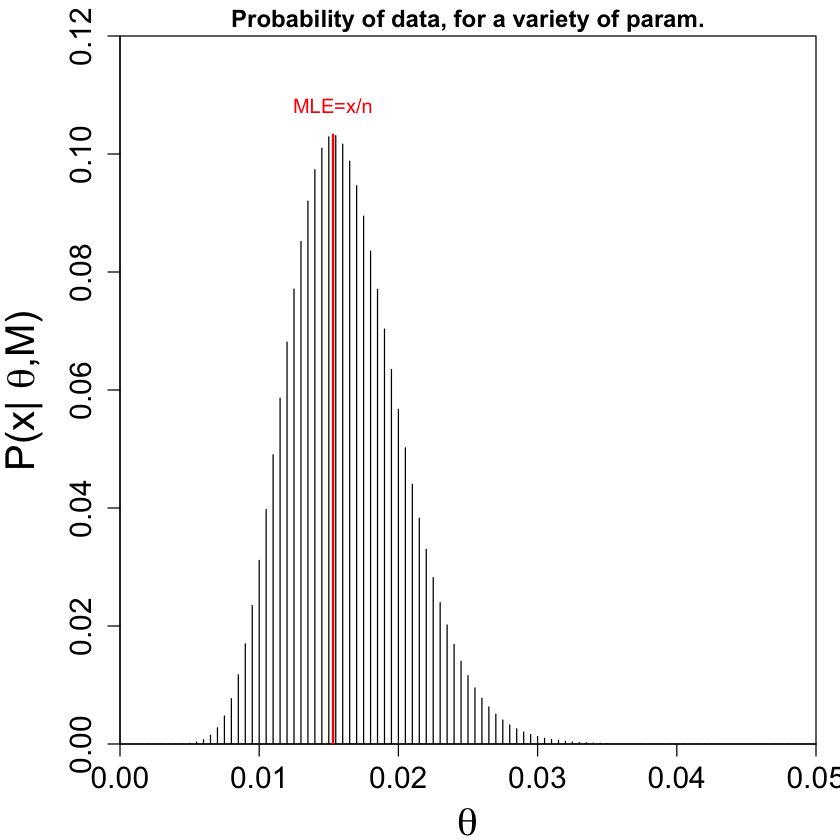

In [33]:
# Data:
n <- 980 # a sample of 980 galaxies
x <- 15  # of which 10 are AGN
MLE <- x/n # Maximum Likelihood Estimator
MLE

par(mfrow=c(1,1), mar=c(4,5,1.5,1))
theta <- seq(from=0, to=0.05, length.out=101) # rectangle centres
plot(theta,dbinom(x=x,size=n,prob=theta),xaxs="i",yaxs="i",
     ylim=c(0,0.12),type = "h",lwd=1,cex.axis=1.5,cex.lab=2,
     xlab = expression(theta),ylab = expression(paste(P,"(x| ",theta,",M)")),
     main= "Probability of data, for a variety of param.")
lines(x=c(MLE,MLE),y=c(0,dbinom(x=x,size=n,prob=MLE)),col="2",lwd=2)
text(MLE, dbinom(x,n,MLE)+0.005,"MLE=x/n",col=2)



# Posterior for a non informative prior

Uniform prior = Beta(1,1)


In [36]:
a <- 1; b <- 1
# Posterior is Beta(x+a,n-x+b)
alfa <- x+a
beta <- n-x+b
Mode.po <- (alfa-1)/(alfa+beta-2)
Mean.po <- alfa/(alfa+beta)
Sd.po <- sqrt(alfa*beta/((alfa+beta)^2*(alfa+beta+1)))

# Summary Posterior (for latter comparison with other prior choices)
summ.post <- array(0,dim=c(7,9))
colnames(summ.post) = c("a","b","alfa","beta","Mean","Sd","Mode","P2.5","P97.5")
summ.post[1,] <- c(a,b,alfa,beta,Mean.po,Sd.po,Mode.po,
                   qbeta(c(0.025,0.975),alfa,beta))

round(summ.post[1,],4)


a        b     alfa     beta     Mean       Sd     Mode     P2.5 
  1.0000   1.0000  16.0000 966.0000   0.0163   0.0040   0.0153   0.0094 
   P97.5 
  0.0251

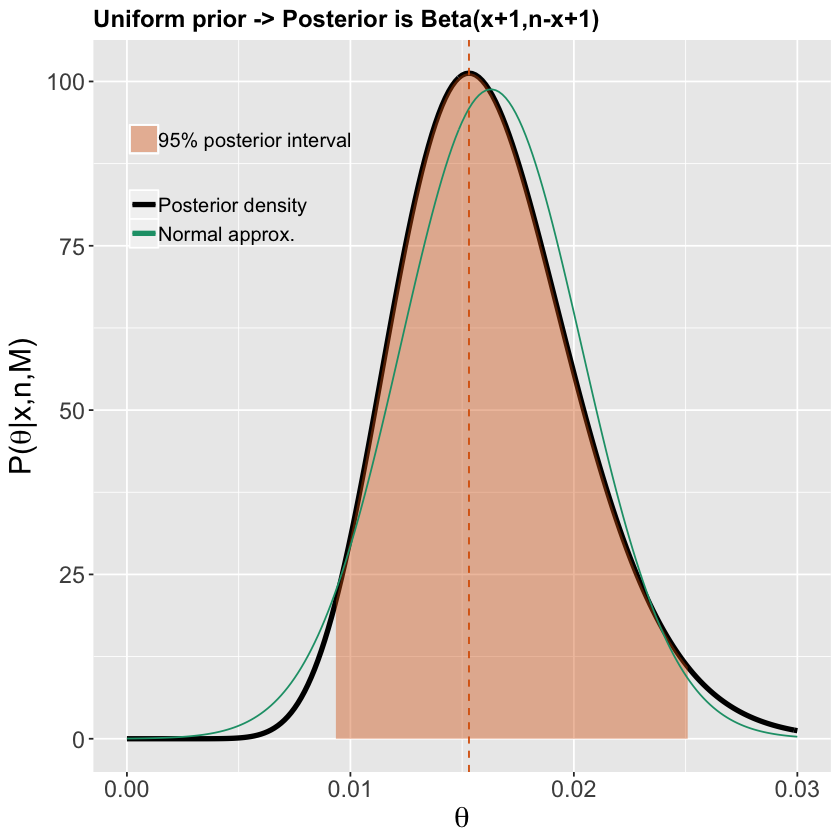

In [66]:
# Evaluate densities at evenly spaced points between 0 and 0.2
df1 <- data.frame(theta = seq(0, 0.03, length.out = 201))
# dunif computes the prior density
df1$pr = dunif(df1$theta) 
# dbeta computes the posterior: Beta(x+a,n-x+b)
df1$po =  dbeta(df1$theta, alfa, beta) 

# seq creates evenly spaced values from 2.5% quantile to 97.5% quantile (i.e., 95% central interval)
# qbeta computes the value for a given quantile given parameters a and b
CI.95 <- data.frame(theta = seq(qbeta(0.025, alfa, beta), qbeta(0.975, alfa, beta), length.out = 100))
# compute the posterior density
CI.95$po <- dbeta(CI.95$theta, alfa, beta)

col = c("black","#1B9E77","#7570B3","#D95F02")

# Plot posterior 
p1 <- ggplot(mapping = aes(theta, po)) +
      geom_line(data = df1,aes(col='1'),lwd=1.5) +
      #geom_line(data = df1,aes(theta,pr),col="cyan") +
      # Add a layer of colorized 95% posterior interval
      geom_area(data = CI.95, aes(fill='1'),alpha=0.4) +
      # Add Normal approx. of the posterior interval
      geom_line(data=df1,aes(theta,dnorm(theta,Mean.po,Sd.po),col='2')) +
      # Add the MLE proportion of AGN fraction = post. Mode
      geom_vline(xintercept = MLE, linetype='dashed',col=col[4]) +
      # Decorate the plot a little
      labs(title='Uniform prior -> Posterior is Beta(x+1,n-x+1)', 
           x = expression(theta),
           y = expression(paste("P(",theta,"|x,n,M)"))) +
      scale_color_manual(values=col[1:2], labels = c("Posterior density","Normal approx.")) +
      scale_fill_manual(values = col[4], labels = '95% posterior interval') +
      theme(axis.text=element_text(size=14),
        axis.title.y  = element_text(size=18,angle=90),
        axis.title.x = element_text(size = 18),
        title=element_text(size=12,face="bold"),
        legend.text=element_text(size=12),
        legend.position = c(0.2, 0.8), 
        legend.background = element_blank(),
        legend.title = element_blank())

#pdf("Binom_ex2.pdf",8,6)
p1
#dev.off()

In [39]:
# 95% central posterior interval
# EXACT POST. DIST.
round(qbeta(c(0.025,0.5,0.975), alfa, beta),4)
# Normal Approx.: TCL
round(qnorm(c(0.025,0.5,0.975),mean=Mean.po,sd=Sd.po),4)

[1] 0.0094 0.0160 0.0251

[1] 0.0084 0.0163 0.0242

### Simulation from the posterior distribution (sampling):

In [42]:
### 1000 draws from the posterior 
df1.b <- data.frame(theta = rbeta(1000,alfa,beta))
df1.b$po <- dbeta(df1.b$theta, alfa, beta)
CI.95b <- df1.b[findInterval(df1.b$theta, quantile(df1.b$theta,c(0.025,0.975))) == 1L,]

summ.post[2,] <- c(a,b,alfa,beta,mean(df1.b$theta),sd(df1.b$theta),
                   df1.b[which.max(df1.b$theta),1],
                   quantile(df1.b$theta,c(0.025,0.975)))
round(summ.post[1:2,],4)

a,b,alfa,beta,Mean,Sd,Mode,P2.5,P97.5
1,1,16,966,0.0163,0.0040,0.0153,0.0094,0.0251
1,1,16,966,0.0163,0.0041,0.0300,0.0094,0.0248


In [46]:
### Numerical comparison with exact post. dist.
post.dist <- data.frame(matrix(ncol = 6, nrow = 3))
colnames(post.dist) <- c("P2.5","P50","P97.5","mean","std. dev","Mode")
row.names(post.dist) <- c("Exact post. dist.","Normal Aprox","post. sample n=1000")
post.dist[1,] <- c(qbeta(c(0.025,0.5,0.975), alfa, beta),Mean.po,Sd.po,Mode.po)
post.dist[2,] <- c(qnorm(c(0.025,0.5,0.975),Mean.po,Sd.po),Mean.po,Sd.po,Mean.po)
post.dist[3,] <- c(quantile(df1.b$theta,c(0.025,0.5,0.975)),
                   mean(df1.b$theta),sd(df1.b$theta),df1.b[which.max(df1.b$po),1])

round(post.dist,4)

,P2.5,P50,P97.5,mean,std. dev,Mode
Exact post. dist.,0.0094,0.0160,0.0251,0.0163,0.0040,0.0153
Normal Aprox,0.0084,0.0163,0.0242,0.0163,0.0040,0.0163
post. sample n=1000,0.0094,0.0159,0.0248,0.0163,0.0041,0.0153


Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

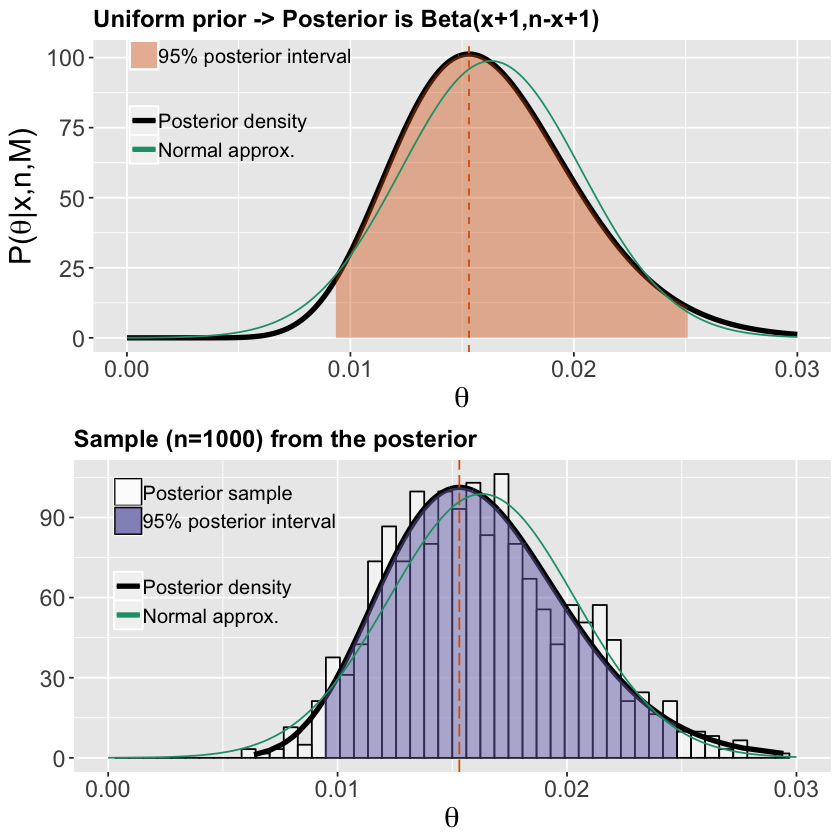

In [67]:
### Plot posterior sample n= 100
p1.b <- ggplot(mapping = aes(theta, po))+
  geom_histogram(data=df1.b,aes(theta,..density..,fill='1'), bins = 50,
                 color = 'black',alpha=0.5) +
  geom_line(data=df1.b, aes(theta,po,col='1'),lwd=1.5) + 
  # Add a layer of colorized 95% posterior interval
  geom_area(data=CI.95b,aes(fill='2'),alpha=0.5) +
  # Add the posterior Mode of AGN fraction
  geom_vline(xintercept = Mode.po, col=col[4],linetype='longdash') +
  # Add Normal approx. of the posterior interval
  geom_line(data=df1,aes(theta,dnorm(theta,Mean.po,Sd.po),col='2')) +
  # Decorate the plot a little
  labs(title='Sample (n=1000) from the posterior', x=expression(theta),y = '') +
  scale_x_continuous(limits = range(df1$theta)) +  
  #scale_y_continuous(breaks = NULL) +
  scale_color_manual(values=col[1:2], labels = c("Posterior density","Normal approx.")) +
  scale_fill_manual(values = c('white',col[3]), labels = c("Posterior sample","95% posterior interval")) +
  guides(fill = guide_legend(order = 1)) + 
  theme(axis.text=element_text(size=14),
        axis.title.y  = element_text(size=18,angle=90),
        axis.title.x = element_text(size = 18),
        title=element_text(size=12,face="bold"),
        legend.text=element_text(size=12),
        legend.position = c(0.2, 0.7), 
        legend.background = element_blank(),
        legend.title = element_blank())

#p1.b
grid.arrange(p1,p1.b, nrow=2)


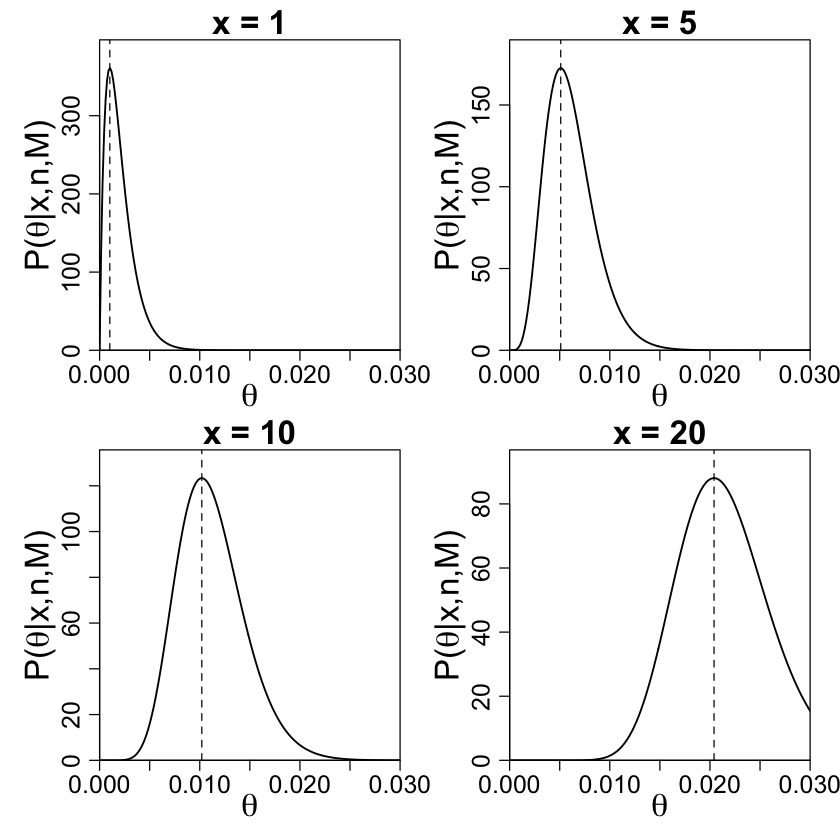

In [68]:
##### Compute the posterior PDF with a uniform prior, for a range of x
# Posterior is dominated by the Likelihood 
par(mfrow=c(2,2), mgp=c(2,0.8,0), mar=c(3.5,4.5,1.5,1), oma=0.5*c(1,1,1,1))
for(y in c(1,5,10,20)) {
  post <- dbeta(df1$theta, y+1, n-y+1)
  plot(df1$theta, post, type="l", lwd=1.5, ylim=c(0,1.1*max(post)), 
       xaxs="i", yaxs="i", xlab=expression(theta), ylab=expression(paste("P(",theta,"|x,n,M)")),
       cex.axis=1.5,cex.lab=2)
  title(main=paste("x =",y), line=0.3, cex.main=2)
  # MLE <- y/n
  abline(v=y/n, lty=2)
}


# Posterior for an informative and conjugated prior

 Beta(a,b) Prior -> posterior is Beta(x+a,n-x+b)

In [69]:
### Prior beliefs: 
### (i) Direct chosen of a and b from Method of Moments:
# a+b = E[theta]*(1-E[theta])/V[theta] - 1
# a = (a+b)*E[theta] ; b = (a+b)*(1-E[theta])
prior.mean = 0.01; prior.var = 0.005^2 # Prior knowledge or assumption
ab =  prior.mean*(1-prior.mean)/prior.var - 1 
a <- ab*prior.mean # no. of successes
b <- ab*(1-prior.mean)  # no. of fails
# Posterior is Beta(x+a,n-x+b)
alfa <- x+a
beta <- n-x+b
Mode.po <- (alfa-1)/(alfa+beta-2)
Mean.po <- alfa/(alfa+beta)
Sd.po <- sqrt(alfa*beta/((alfa+beta)^2*(alfa+beta+1)))
# Summary Posterior 
summ.post[3,] <- c(a,b,alfa,beta,Mean.po,Sd.po,Mode.po,
                   qbeta(c(0.025,0.975),alfa,beta))

round(summ.post[3,],4)


a         b      alfa      beta      Mean        Sd      Mode      P2.5 
   3.9500  391.0500   18.9500 1356.0500    0.0138    0.0031    0.0131    0.0083 
    P97.5 
   0.0206

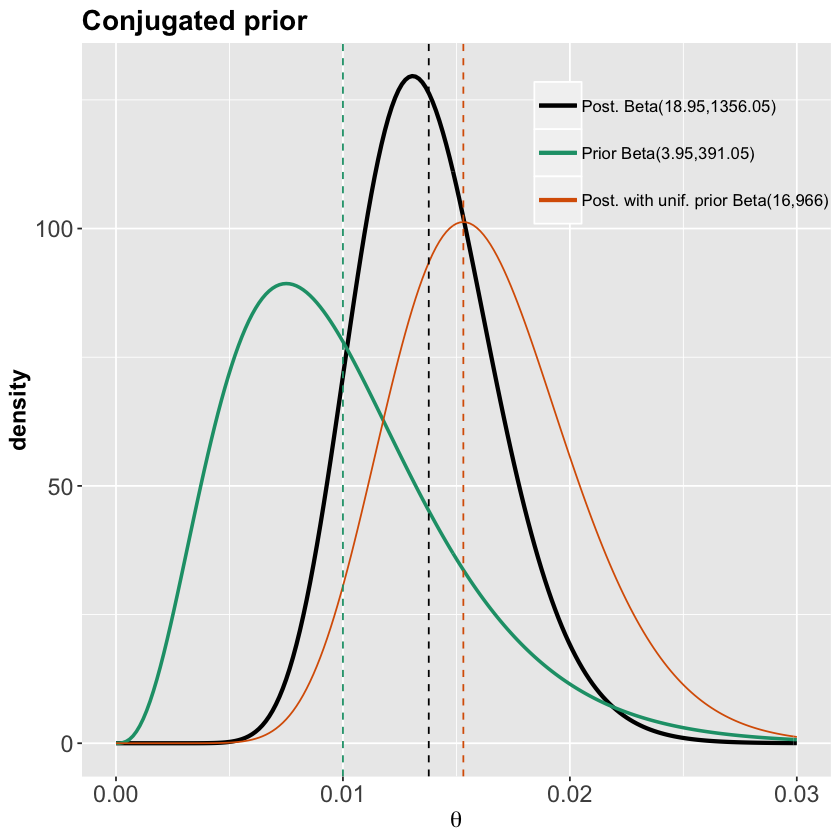

In [71]:
# beta.prior returns for given shape parameters of a beta density (a,b), 
# number of observed successes (s=x) and failures (f=n-x) and a data
# frame with values of theta, a new data frame with prior and posterior
# values evaluated at points theta.
beta.prior <- function(theta,a,b,s,f){
  cbind(theta, pr = dbeta(theta,a,b), po = dbeta(theta, a + s, b + f), 
        a = a,b=b,Mean.po = (a + s)/(a + s + b + f))
}

th <- seq(0, 0.03, length.out = 201)
df2 <- data.frame(beta.prior(th,a,b,x,n-x))

# plot posterior
p2 <- ggplot(data = df2) + #[which(df2$a == 3.95),]
  geom_line(aes(theta, po,color='1'),lwd=1.2) +
  geom_line(aes(theta, pr,color='2'),lwd=1) +
  geom_line(data=df1,aes(theta,po,color='3')) +
  geom_vline(xintercept = Mean.po, linetype = 'dashed',col=col[1]) +
  geom_vline(xintercept = prior.mean, linetype = 'dashed',col=col[2]) +
  geom_vline(xintercept = x/n, linetype = 'dashed',col=col[4]) +
  # Decorate the plot a little
  labs(title='Conjugated prior', 
       x = expression(theta),
       y = 'density') +
  scale_x_continuous(limits = range(df2$theta)) +  
  scale_color_manual(values = col[c(1,2,4)],
                     labels = c(paste0("Post. Beta(",alfa,",",beta,")"),
                                paste0("Prior Beta(",a,",",b,")"),
                                paste0("Post. with unif. prior Beta(",x+1,",",n-x+1,")")))+
  theme(axis.text=element_text(size=14),
        axis.title.y  = element_text(size=14,angle=90),
        axis.title.x = element_text(size = 14),
        title=element_text(size=14,face="bold"),
        legend.text=element_text(size=10),
        #legend.spacing.x = unit(0.75, 'cm'),
        legend.key.size = unit(1, "cm"),
        legend.position = c(0.8, 0.85), 
        legend.background = element_blank(),
        legend.title = element_blank())

p2


In [72]:
# 95% central posterior interval
# EXACT POST. DIST.
round(qbeta(c(0.025,0.5,0.975), alfa, beta),4)
# Normal Approx.: TCL
round(qnorm(c(0.025,0.5,0.975),mean=Mean.po,sd=Sd.po),4)

[1] 0.0083 0.0135 0.0206

[1] 0.0076 0.0138 0.0199

### Simulation from the posterior distribution (sampling):

In [73]:
### 1000 draws from the posterior 
df2.sample <- data.frame(theta = rbeta(1000,alfa,beta))
df2.sample$po <- dbeta(df2.sample$theta, alfa, beta)
CI.95sample <- df2.sample[findInterval(df2.sample$theta, quantile(df2.sample$theta,c(0.025,0.975))) == 1,]

summ.post[4,] <- c(a,b,alfa,beta,mean(df2.sample$theta),sd(df2.sample$theta),
                   df2.sample[which.max(df2.sample$theta),1],
                   quantile(df2.sample$theta,c(0.025,0.975)))

round(summ.post[4,],4)

a         b      alfa      beta      Mean        Sd      Mode      P2.5 
   3.9500  391.0500   18.9500 1356.0500    0.0138    0.0031    0.0273    0.0084 
    P97.5 
   0.0203

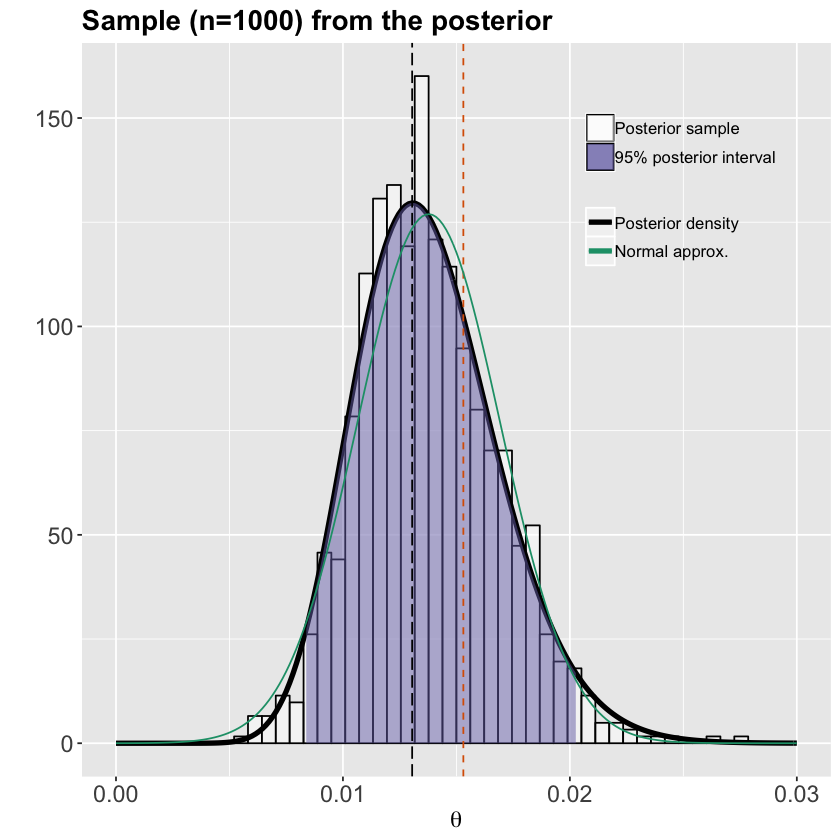

In [76]:
## plotting
p2.sample<- ggplot(mapping = aes(theta, po))+
  geom_histogram(data=df2.sample,aes(theta,..density..,fill='1'), bins = 50,
                 color = 'black',alpha=0.5) +
  geom_line(data=df2, aes(theta,po,col='1'),lwd=1.5) + 
  # Add a layer of colorized 95% posterior interval
  geom_area(data=CI.95sample,aes(fill='2'),alpha=0.5) +
  # Add posterior mode
  geom_vline(xintercept = df2[which.max(df2$po),1], linetype='longdash',col=col[1]) +
  # Add the posterior Mode of AGN fraction
  geom_vline(xintercept = MLE, col=col[4],linetype='dashed') +
  # Add Normal approx. of the posterior interval
  geom_line(data=df1,aes(theta,dnorm(theta,Mean.po,Sd.po),col='2')) +
  # Decorate the plot a little
  labs(title='Sample (n=1000) from the posterior', x=expression(theta),y = '') +
  scale_x_continuous(limits = range(df1$theta)) +  
  #scale_y_continuous(breaks = NULL) +
  scale_color_manual(values=col[1:2], labels = c("Posterior density","Normal approx.")) +
  scale_fill_manual(values = c('white',col[3]), labels = c("Posterior sample","95% posterior interval")) +
  guides(fill = guide_legend(order = 1)) + 
  theme(axis.text=element_text(size=14),
        axis.title.y  = element_text(size=14,angle=90),
        axis.title.x = element_text(size = 14),
        title=element_text(size=14,face="bold"),
        legend.text=element_text(size=10),
        legend.position = c(0.8, 0.8), 
        legend.background = element_blank(),
        legend.title = element_blank())


#grid.arrange(p2,p2.sample, nrow=2)
p2.sample

### Illustrate the effect of prior selection
 Comparison of posterior distributions with different parameter values for the beta prior distribution.

In [79]:
### Find the shape parameters of a beta density 
# that matches knowledge of two quantiles of the distribution.
library(LearnBayes)
quantile2=list(p=.9,x=.015) # 90th percentile is 0.015
quantile1=list(p=.5,x=.01)  # Median is 0.008
ab=beta.select(quantile1,quantile2)

df2 <- rbind(df2,beta.prior(th,ab[1],ab[2],x,n-x))

# Summary Posterior Beta(x+a,n-x+b)
alfa <- x+ab[1] ; beta <- n-x+ab[2]
summ.post[5,] <- c(ab[1],ab[2],alfa,beta,alfa/(alfa+beta),sqrt(alfa*beta/((alfa+beta)^2*(alfa+beta+1))),
                   (alfa-1)/(alfa+beta-2),qbeta(c(0.025,0.975),alfa,beta))

round(summ.post[5,],4)

a         b      alfa      beta      Mean        Sd      Mode      P2.5 
   8.8600  844.6200   23.8600 1809.6200    0.0130    0.0026    0.0125    0.0083 
    P97.5 
   0.0187

In [80]:
### other different choices for beta priors with the same prior ratio
# of successes (prior.mean=a/(a+b)), but different number of prior observations (pc=a+b)
# a =  pc*prior.mean
# b = pc*(1-prior.mean)
pc <- c(200,2000) # prior counts = a+b
prior.mean <- .01 # prior ratio of success, i.e. prior mean

# Summary Posterior Beta(x+a,n-x+b)
a <- pc[1]*prior.mean; b=pc[1]*(1-prior.mean)
alfa <- x+a ; beta <- n-x+b
summ.post[6,] <- c(a,b,alfa,beta,alfa/(alfa+beta),sqrt(alfa*beta/((alfa+beta)^2*(alfa+beta+1))),
                   (alfa-1)/(alfa+beta-2),qbeta(c(0.025,0.975),alfa,beta))

a <- pc[2]*prior.mean; b=pc[2]*(1-prior.mean)
alfa <- x+a ; beta <- n-x+b
summ.post[7,] <- c(a,b,alfa,beta,alfa/(alfa+beta),sqrt(alfa*beta/((alfa+beta)^2*(alfa+beta+1))),
                   (alfa-1)/(alfa+beta-2),qbeta(c(0.025,0.975),alfa,beta))

round(summ.post[6:7,],4)

a,b,alfa,beta,Mean,Sd,Mode,P2.5,P97.5
2,198,17,1163,0.0144,0.0035,0.0136,0.0084,0.0219
20,1980,35,2945,0.0117,0.0020,0.0114,0.0082,0.0159


Compute now the posterior for the different priors selection

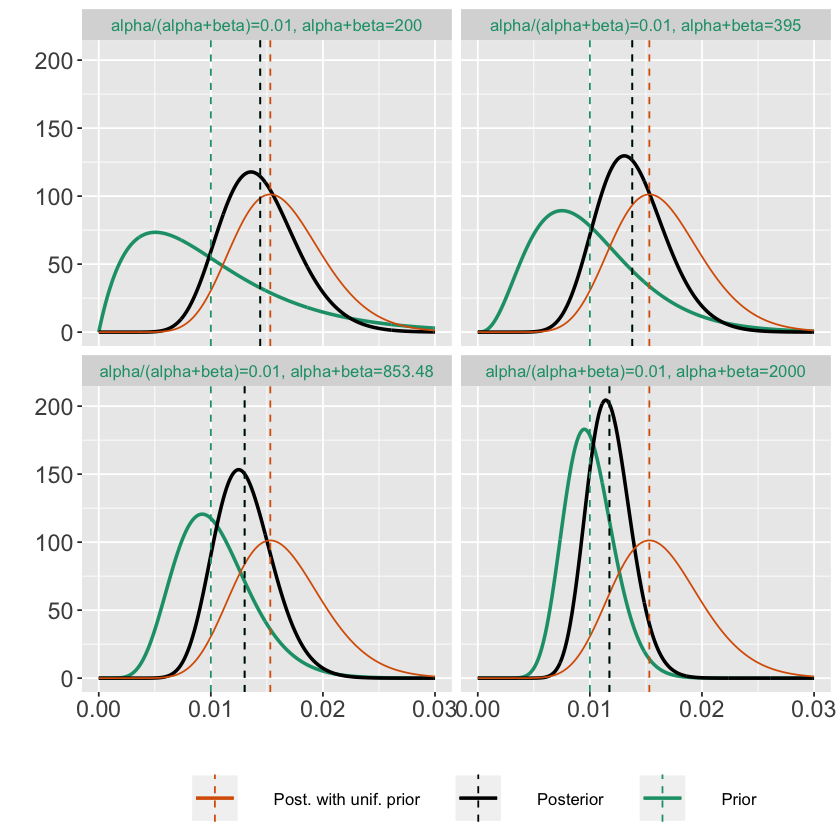

In [84]:
# beta.prior.cteratio returns for given number of prior observations (a+b), prior ratio
# of successes (a/(a+b)), number of observed successes (s=x) and failures (f=n-x) and a data
# frame with values of theta, a new data frame with prior and posterior
# values evaluated at points theta.
beta.prior.cteratio <- function(pc, prior.mean, s, f, theta){
  cbind(theta, pr = dbeta(theta, pc*prior.mean, pc*(1-prior.mean)), 
        po = dbeta(theta, pc*prior.mean + s, pc*(1-prior.mean) + f), 
        a = pc*prior.mean,b=pc*(1-prior.mean),
        Mean.po = (pc*prior.mean + s)/(pc*prior.mean + s + pc*(1-prior.mean) + f))
}

# lapply function over prior counts pc 
# %>% pipe operator : Pipe an object forward into a function or call expression.
df2 <- data.frame(rbind(df2,
             lapply(pc, beta.prior.cteratio, prior.mean, x, n-x, th) %>% do.call(rbind, args = .)))


# gather results into key-value pairs (for plotting purposes)
df2.bis <- gather(df2,grp, p, -c(theta, a,b,Mean.po), factor_key = T)
levels(df2.bis$grp) <- c('Prior', 'Posterior')

# add correct labels for plotting
df2.bis$title <- factor(paste0('alpha/(alpha+beta)=',round(df2.bis$a/(df2.bis$a+df2.bis$b),3), 
                               ', alpha+beta=',round(df2.bis$a+df2.bis$b,3)))
# To change the order in which the panels appear, change the levels
# of the underlying factor.
df2.bis$title2 <- reorder(df2.bis$title,df2.bis$a)

###
p2.b <- ggplot(data = df2.bis) +
      geom_line(aes(theta, p, color = grp),lwd=1) +
      facet_wrap(~title2, ncol = 2) +
      geom_line(data=df1,aes(theta,po,color='Post. with unif. prior')) +
      geom_vline(aes(xintercept = Mean.po, color = grp),linetype = 'dashed') +
      #geom_vline(xintercept = summ.post[,6], linetype = 'dashed',col=col[1]) +
      geom_vline(xintercept = prior.mean, linetype = 'dashed',col=col[2]) +
      geom_vline(xintercept = x/n, linetype = 'dashed',col=col[4]) +
      labs(x = '', y = '') +
      scale_x_continuous(limits = range(df2$theta)) +  
      #scale_y_continuous(breaks = NULL) +
      scale_color_manual(values = col[c(4,1,2)]) +
      theme(axis.text=element_text(size=14),
            axis.title.y  = element_text(size=14,angle=90),
            axis.title.x = element_text(size = 14),
            title=element_text(size=14,face="bold"),
            strip.text.x = element_text(size = 10,colour=col[2]),
            legend.position = 'bottom', 
            legend.text=element_text(size=10),
            legend.spacing.x = unit(0.75, 'cm'),
            legend.key.size = unit(1, "cm"),
            legend.title = element_blank())

p2.b

# Posterior for an informative and conjugated prior

Calculate the posterior distribution on a discrete grid of points by multiplying the likelihood and a non-conjugate prior at each point, and normalizing over the points


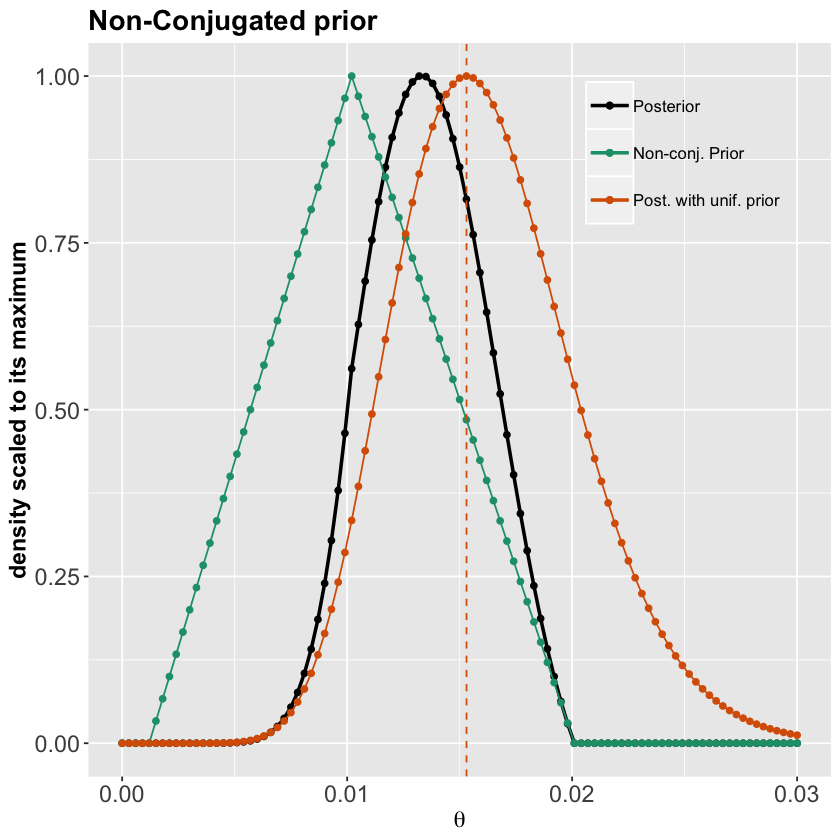

In [85]:
# Discrete grid of points
df3 <- data.frame(theta = seq(0, 0.03, length.out = 101))
df3$pr <- rep(0,101)
# choose three parameter values which define/characterize the prior:
pr.ind <- sapply(c(0.001, 0.01, 0.02), function(ind) which(df3$theta >= ind)[1]) #0.001, 0.01, 0.02
pr.max <- 10 # maximum weight
# assigning increasing/decreasing weights respectively: 
df3$pr[pr.ind[1]:pr.ind[2]] <- seq(0, pr.max, length.out = length(pr.ind[1]:pr.ind[2]))
df3$pr[pr.ind[3]:pr.ind[2]] <- seq(0, pr.max, length.out = length(pr.ind[3]:pr.ind[2]))
# normalize the prior
df3$pr <- df3$pr / sum(df3$pr)
# compute the un-normalized non-conjugate posterior in the grid
df3$po <- df3$pr * dbinom(x,n,df3$theta) #dbeta(df3$theta, x+1, n-x+1) 
# normalize the posterior
df3$po <- df3$po / sum(df3$po)

# compute the posterior with uniform prior (Beta(1,1)), for comparison purposes
df3$pu <- dbeta(df3$theta, x+1, n-x+1) 


# Plot posterior 
p3 <- ggplot(data = df3) +
      geom_line(aes(theta, po/max(df3$po),color='1'),lwd=1) +
      geom_point(aes(theta, po/max(df3$po),color='1')) +
      geom_line(aes(theta, pr/max(df3$pr),color='2')) +
      geom_point(aes(theta, pr/max(df3$pr),color='2')) +
      geom_line(aes(theta, pu/max(df3$pu),color='3')) +
      geom_point(aes(theta, pu/max(df3$pu),color='3')) +
      geom_vline(xintercept = x/n, linetype = 'dashed',col=col[4]) +
      # Decorate the plot a little
      labs(title='Non-Conjugated prior', 
            x = expression(theta),
            y = "density scaled to its maximum") +
      scale_x_continuous(limits = range(df3$theta)) +  
      scale_color_manual(values = col[c(1,2,4)],
                     labels = c("Posterior", "Non-conj. Prior","Post. with unif. prior"))+
      theme(axis.text=element_text(size=14),
            axis.title.y  = element_text(size=14,angle=90),
            axis.title.x = element_text(size = 14),
            title=element_text(size=14,face="bold"),
            legend.text=element_text(size=10),
            #legend.spacing.x = unit(0.75, 'cm'),
            legend.key.size = unit(1, "cm"),
            legend.position = c(0.8, 0.85), 
            legend.background = element_blank(),
            legend.title = element_blank())

p3

In [86]:
# Summaries of the post. d
Mean.po <- sum(df3$theta*df3$po)
Sd.po <- sqrt(sum(df3$theta^2*df3$po) - Mean.po^2)
Mode.po <- df3[which.max(df3$po),1]
# compute the cumulative density in a grid
df3$cs_po <- cumsum(df3$po)
# function to find the value smallest value x at which the cumulative
# sum of the posterior densities is greater than r.
invcdf <- function(r, df) df$theta[sum(df$cs_po < r) + 1]


summ.post <- rbind(summ.post,
                   c(0,0,0,0,Mean.po,Sd.po,Mode.po,
                     invcdf(0.025,df3),invcdf(0.975,df3)))

round(summ.post[8,],4)

a      b   alfa   beta   Mean     Sd   Mode   P2.5  P97.5 
0.0000 0.0000 0.0000 0.0000 0.0135 0.0025 0.0132 0.0087 0.0183

### Simulation from the posterior distribution (sampling):

In [87]:
# Simulate samples from the resulting non-standard posterior distribution :
# Simulated sample from the posterior
sample <- sample(df3$theta, 1000, replace = TRUE, prob = df3$po)
summary(sample)

ind <- sapply(sample, function(th) which(df3$theta == th))
df3.sample = data.frame(theta=df3[ind,]$theta,
                        po = df3[ind,]$po)

CI.95sample <- df3.sample[findInterval(df3.sample$theta, 
                                       quantile(df3.sample$theta,c(0.025,0.975))) == 1,]

# Summaries of the post. d
summ.post <- rbind(summ.post,
                   c(0,0,0,0,mean(df3.sample$theta),sd(df3.sample$theta),df3.sample[which.max(df3.sample$theta),1],
                     quantile(df3.sample$theta,c(0.025,0.975))))


round(summ.post,4)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00570 0.01170 0.01350 0.01347 0.01530 0.01980 

a,b,alfa,beta,Mean,Sd,Mode,P2.5,P97.5
1.00,1.00,16.00,966.00,0.0163,0.0040,0.0153,0.0094,0.0251
1.00,1.00,16.00,966.00,0.0163,0.0041,0.0300,0.0094,0.0248
3.95,391.05,18.95,1356.05,0.0138,0.0031,0.0131,0.0083,0.0206
3.95,391.05,18.95,1356.05,0.0138,0.0031,0.0273,0.0084,0.0203
8.86,844.62,23.86,1809.62,0.0130,0.0026,0.0125,0.0083,0.0187
2.00,198.00,17.00,1163.00,0.0144,0.0035,0.0136,0.0084,0.0219
20.00,1980.00,35.00,2945.00,0.0117,0.0020,0.0114,0.0082,0.0159
0.00,0.00,0.00,0.00,0.0135,0.0025,0.0132,0.0087,0.0183
0.00,0.00,0.00,0.00,0.0135,0.0026,0.0198,0.0084,0.0183


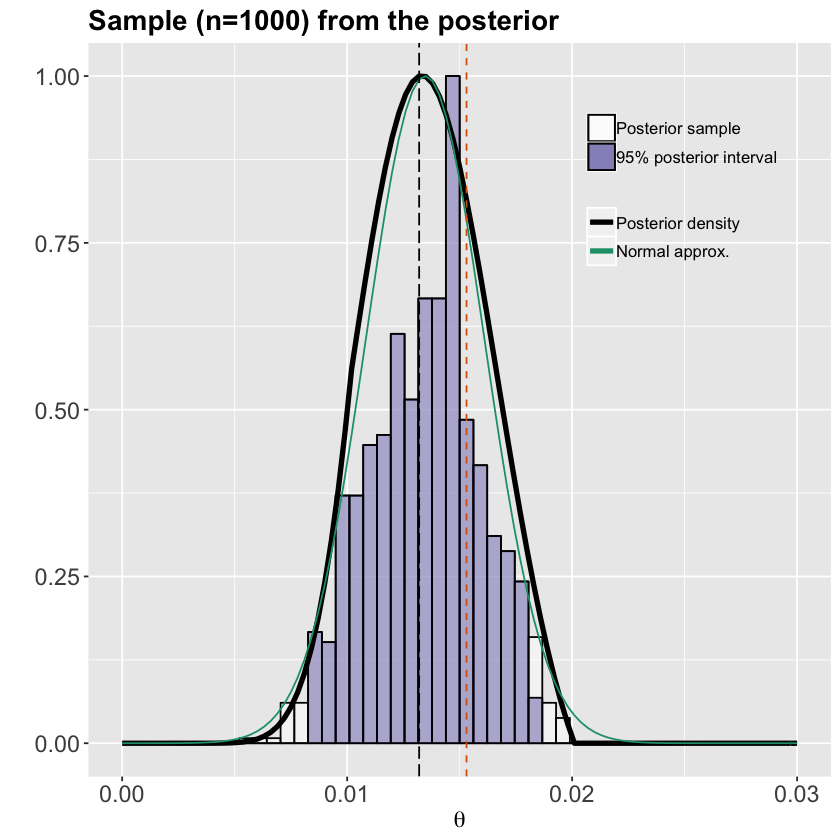

In [89]:
## plotting
p3.sample <-  ggplot(mapping = aes(theta, po)) +
              geom_histogram(data = df3.sample,aes(theta,..ndensity..,fill='1'), bins = 50,
                             color = 'black',alpha=0.5) +
              # Add a layer of colorized 95% posterior interval
              geom_histogram(data=CI.95sample,aes(theta,..ndensity..,fill='2'), bins = 50,
                             color = 'black',alpha=0.5)  +
              # Add the posterior scaled to its maximum 
              geom_line(data=df3, aes(theta,po/max(po),col='1'),lwd=1.5) + 
              # Add Normal approx. of the posterior interval
              geom_line(data=data.frame(theta=df3$theta,po = dnorm(df3$theta,mean(sample),sd(sample))),
                        aes(theta,po/max(po),col='2')) +
              # Add posterior mode
              geom_vline(xintercept = df3[which.max(df3$po),1], linetype='longdash',col=col[1]) +
              # Add the MLE proportion of AGN fraction
              geom_vline(xintercept = MLE, linetype='dashed',col=col[4]) +
              # Decorate the plot a little
              labs(title='Sample (n=1000) from the posterior', x=expression(theta),y = '') +
              scale_x_continuous(limits = range(df3$theta)) +  
              #scale_y_continuous(breaks = NULL) +
              scale_color_manual(values=col[1:2], labels = c("Posterior density","Normal approx.")) +
              scale_fill_manual(values = c('white',col[3]), labels = c("Posterior sample","95% posterior interval")) +
              guides(fill = guide_legend(order = 1)) + 
              theme(axis.text=element_text(size=14),
                    axis.title.y  = element_text(size=14,angle=90),
                    axis.title.x = element_text(size = 14),
                    title=element_text(size=14,face="bold"),
                    legend.text=element_text(size=10),
                    legend.position = c(0.8, 0.8), 
                    legend.background = element_blank(),
                    legend.title = element_blank())


#grid.arrange(p2,p2.sample, p3, p3.sample, ncol=2)
p3.sample

# Comparison between different prior selection:
#grid.arrange(p1,p1.b,p2, p2.sample,p3, p3.sample, ncol=2)

### Next demonstrate inverse cdf sampling : 
Simulate samples from the resulting non-standard posterior distribution, using inverse cdf using the discrete grid.

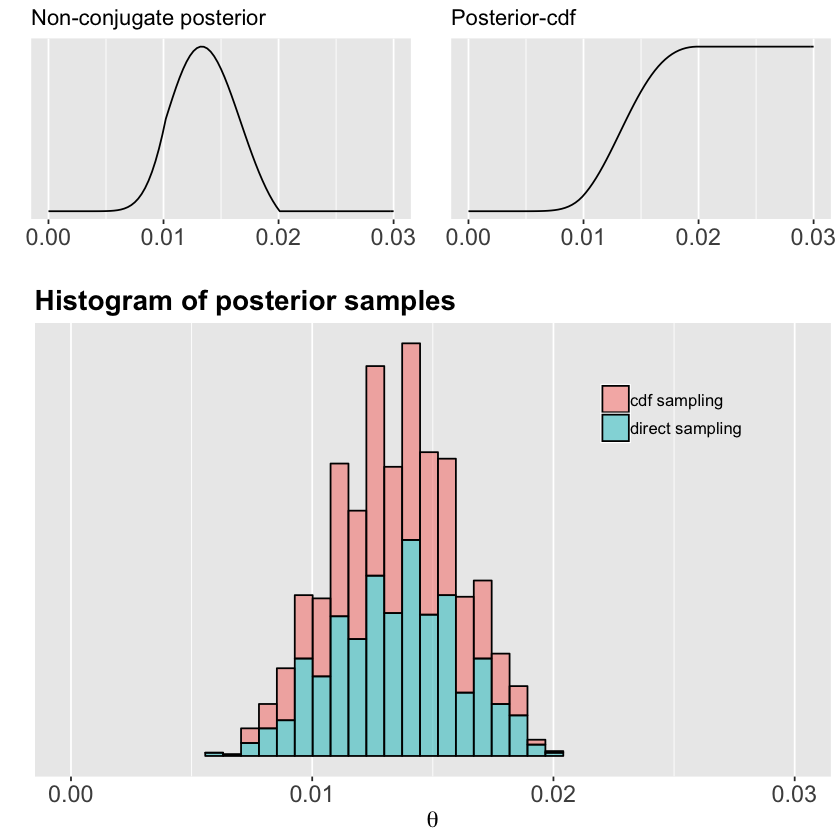

In [92]:
# compute the cumulative density in a grid
# runif(k) returns k uniform random numbers from interval [0,1]
# set.seed(seed) is used to set seed for the randon number generator
set.seed(2601)
r <- runif(1000)
# sapply function for each sample r. The returned values s are now
# random draws from the distribution.
s <- sapply(r, invcdf, df3)
df3.sample$sample <- "direct sampling"
df3.samples <- rbind(df3.sample[,c(1,3)],
                     data.frame(theta = s, sample="cdf sampling"))
# create three plots: p1 is the posterior, p2 is the cdf of the posterior
# and p3 is the histogram of posterior samples (drawn using inv. cdf)
p3.a <- ggplot(data = df3) +
  geom_line(aes(theta, po)) +
  coord_cartesian(xlim = range(df3$theta)) +
  labs(title = 'Non-conjugate posterior', x = '', y = '') +
  scale_y_continuous(breaks = NULL) +
  theme(axis.text=element_text(size=14))

p3.b <- ggplot(data = df3) +
  geom_line(aes(theta, cs_po)) +
  coord_cartesian(xlim = range(df3$theta)) +
  labs(title = 'Posterior-cdf', x = '', y = '') +
  scale_y_continuous(breaks = NULL)+
  theme(axis.text=element_text(size=14))

p3.c <- ggplot(data = df3.samples) +
        geom_histogram(aes(theta,fill=sample), bins = 20, color = 'black',alpha=0.5) +
        coord_cartesian(xlim = range(df3$theta)) +
        labs(title = 'Histogram of posterior samples', x = expression(theta), y = '') +
        scale_y_continuous(breaks = NULL) +
        theme(axis.text=element_text(size=14),
              axis.title.x = element_text(size = 14),
              title=element_text(size=14,face="bold"),
              legend.position = c(0.8, 0.8),
              legend.text=element_text(size=10),
              legend.background = element_blank(),
              legend.title = element_blank())


# combine the plots
grid.arrange(p3.a, p3.b, p3.c, layout_matrix = rbind(c(1,2),c(3,3),c(3,3)))


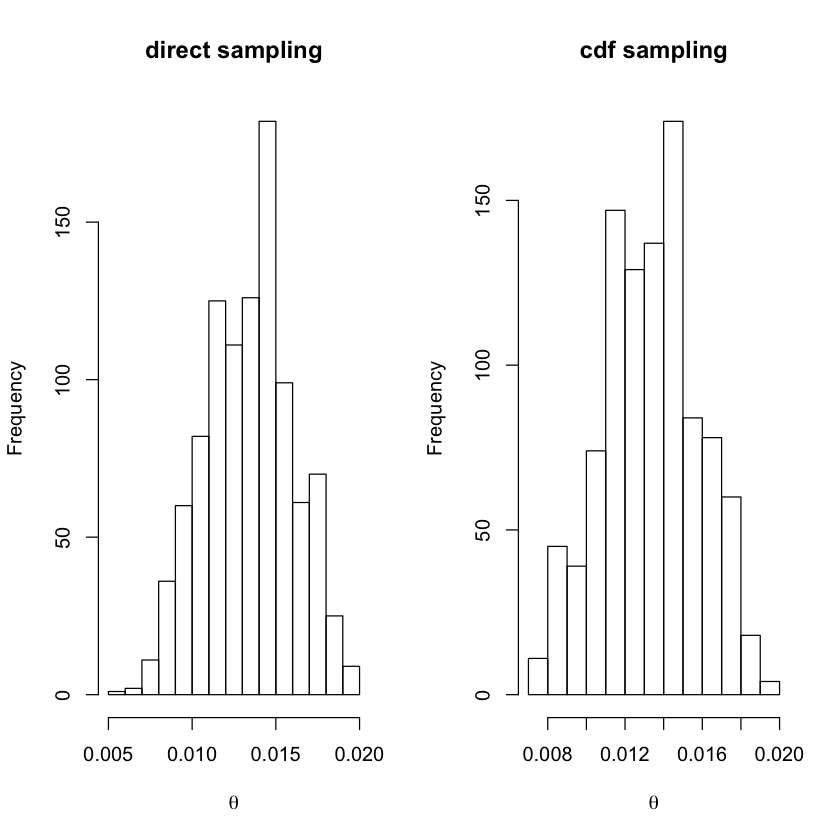

In [91]:
par(mfrow=c(1,2))
hist(df3.samples[which(df3.samples$sample == "direct sampling"),]$theta,
     xlab = expression(theta),main = 'direct sampling')
hist(df3.samples[which(df3.samples$sample == "cdf sampling"),]$theta,
     xlab = expression(theta),main = 'cdf sampling')


# BAYES FACTOR: Model comparison

In [93]:
# (A) Non-inform uniform=Beta(1,1) prior :
evidence.A = 1/(n+1)

# (B) Inform. conjungated prior: Beta(a,b)
prior.mean = 0.01; prior.var = 0.005^2 # Prior knowledge or assumption
ab =  prior.mean*(1-prior.mean)/prior.var - 1 
a <- ab*prior.mean # no. of successes
b <- ab*(1-prior.mean)  # no. of fails

evidence.B = choose(n,x)*beta(x+a,n-x+b)/beta(a,b)

BF.AB = evidence.A/evidence.B 

BF.AB
1/BF.AB

[1] 0.02994348

[1] 33.39625